In [31]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [53]:
df = pd.read_csv('Intake-Surveys_Feb25.csv')

In [33]:
list(df.columns)

['Connect to my audience when recording',
 'Elicit a variety of emotions',
 'Empowers me personally',
 'Empowers me professionally',
 'English native language',
 'Familiar with power of presence',
 'First Name']

In [34]:
df = df[3:]
df

,Connect to my audience when recording,Elicit a variety of emotions,Empowers me personally,Empowers me professionally,English native language,Familiar with power of presence,First Name
3,3 - Pretty familiar,3 - Pretty familiar,3 - Pretty familiar,4 - Absolutely!,Yes,3 - Pretty familiar,Tahjae
4,1 - Not so much.,1 - Not so much.,1 - Not so much.,1 - Not so much.,Yes,2- Somewhat.,Kristian
5,2- Somewhat.,2- Somewhat.,4 - Absolutely!,4 - Absolutely!,Yes,3 - Pretty familiar,Mae
6,1 - Not so much.,1 - Not so much.,2- Somewhat.,2- Somewhat.,Yes,2- Somewhat.,Georgina
7,2- Somewhat.,2- Somewhat.,2- Somewhat.,2- Somewhat.,Yes,3 - Pretty familiar,Emmanuel
...,...,...,...,...,...,...,...
406,2- Somewhat.,2- Somewhat.,4 - Absolutely!,4 - Absolutely!,No,3 - Pretty familiar,Carlos
407,2- Somewhat.,2- Somewhat.,2- Somewhat.,2- Somewhat.,Yes,2- Somewhat.,Patrick
408,3 - Pretty familiar,2- Somewhat.,2- Somewhat.,2- Somewhat.,Yes,3 - Pretty familiar,Howard
409,2- Somewhat.,3 - Pretty familiar,3 - Pretty familiar,3 - Pretty familiar,No,2- Somewhat.,Chandana


In [35]:
df.rename(columns={'Connect to my audience when recording': 'Connect'}, inplace=True)
df.rename(columns={'Elicit a variety of emotions': 'Emotions'}, inplace=True)
df.rename(columns={'Empowers me personally': 'Empower Personal'}, inplace=True)
df.rename(columns={'Empowers me professionally': 'Empower Professionally'}, inplace=True)
df.rename(columns={'Familiar with power of presence': 'Presence'}, inplace=True)
df.rename(columns={'Headspace to record my message': 'Headspace'}, inplace=True)

In [36]:
list(df.columns)

['Connect',
 'Emotions',
 'Empower Personal',
 'Empower Professionally',
 'English native language',
 'Presence',
 'First Name']

In [37]:
def extract_number(s):
    if isinstance(s, str):
        match = re.match(r"(\d+)", s)
        return int(match.group(1))
    return None

In [38]:
columns_to_clean = ["Connect", "Emotions", "Empower Personal", "Empower Professionally", "Presence"]

In [39]:
for col in columns_to_clean:
    df[col] = df[col].apply(extract_number)

In [44]:
means = df[columns_to_clean].mean()
means

Connect                   1.849246
Emotions                  1.992424
Empower Personal          2.105793
Empower Professionally    2.193955
Presence                  2.140704
dtype: float64

(0.0, 5.0)

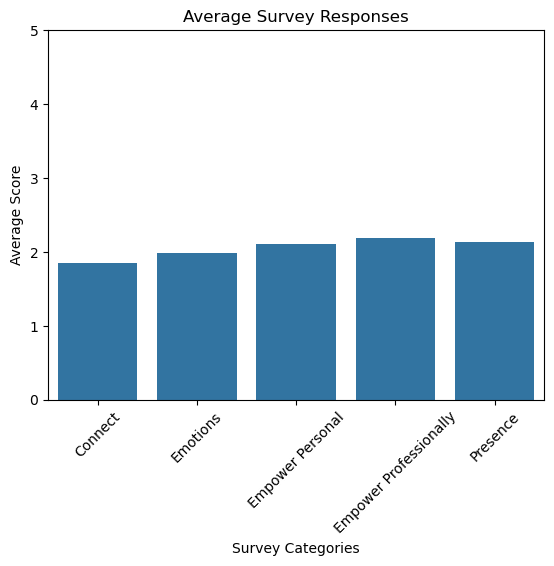

In [49]:
sns.barplot(x=means.index, y=means.values)
plt.xlabel("Survey Categories")
plt.ylabel("Average Score")
plt.title("Average Survey Responses")
plt.xticks(rotation=45)
plt.ylim(0, 5)